In [13]:
import matplotlib.pyplot as plt
import pandas as pd

dp5 = pd.read_csv('dpm-experiments.csv')
dp2 = pd.read_csv('dpm-experiments-p2.csv')

In [14]:
dp5["solved"] = dp5["lower_bound"] == dp5["incumbent"]

In [15]:
dp5.columns

Index(['name', 'warmstart', 'lb1_start', 'lb5_start', 'incumbent',
       'lower_bound', 'execution_time', 'gap', 'nodes', 'sequence', 'solved'],
      dtype='object')

In [16]:
df_out = pd.merge(
    dp5[["name", "nodes", "solved"]],
    dp2[["name", "nodes"]],
    on="name",
    suffixes=("_5", "_2"),
)
df_out.query("solved == True", inplace=True)

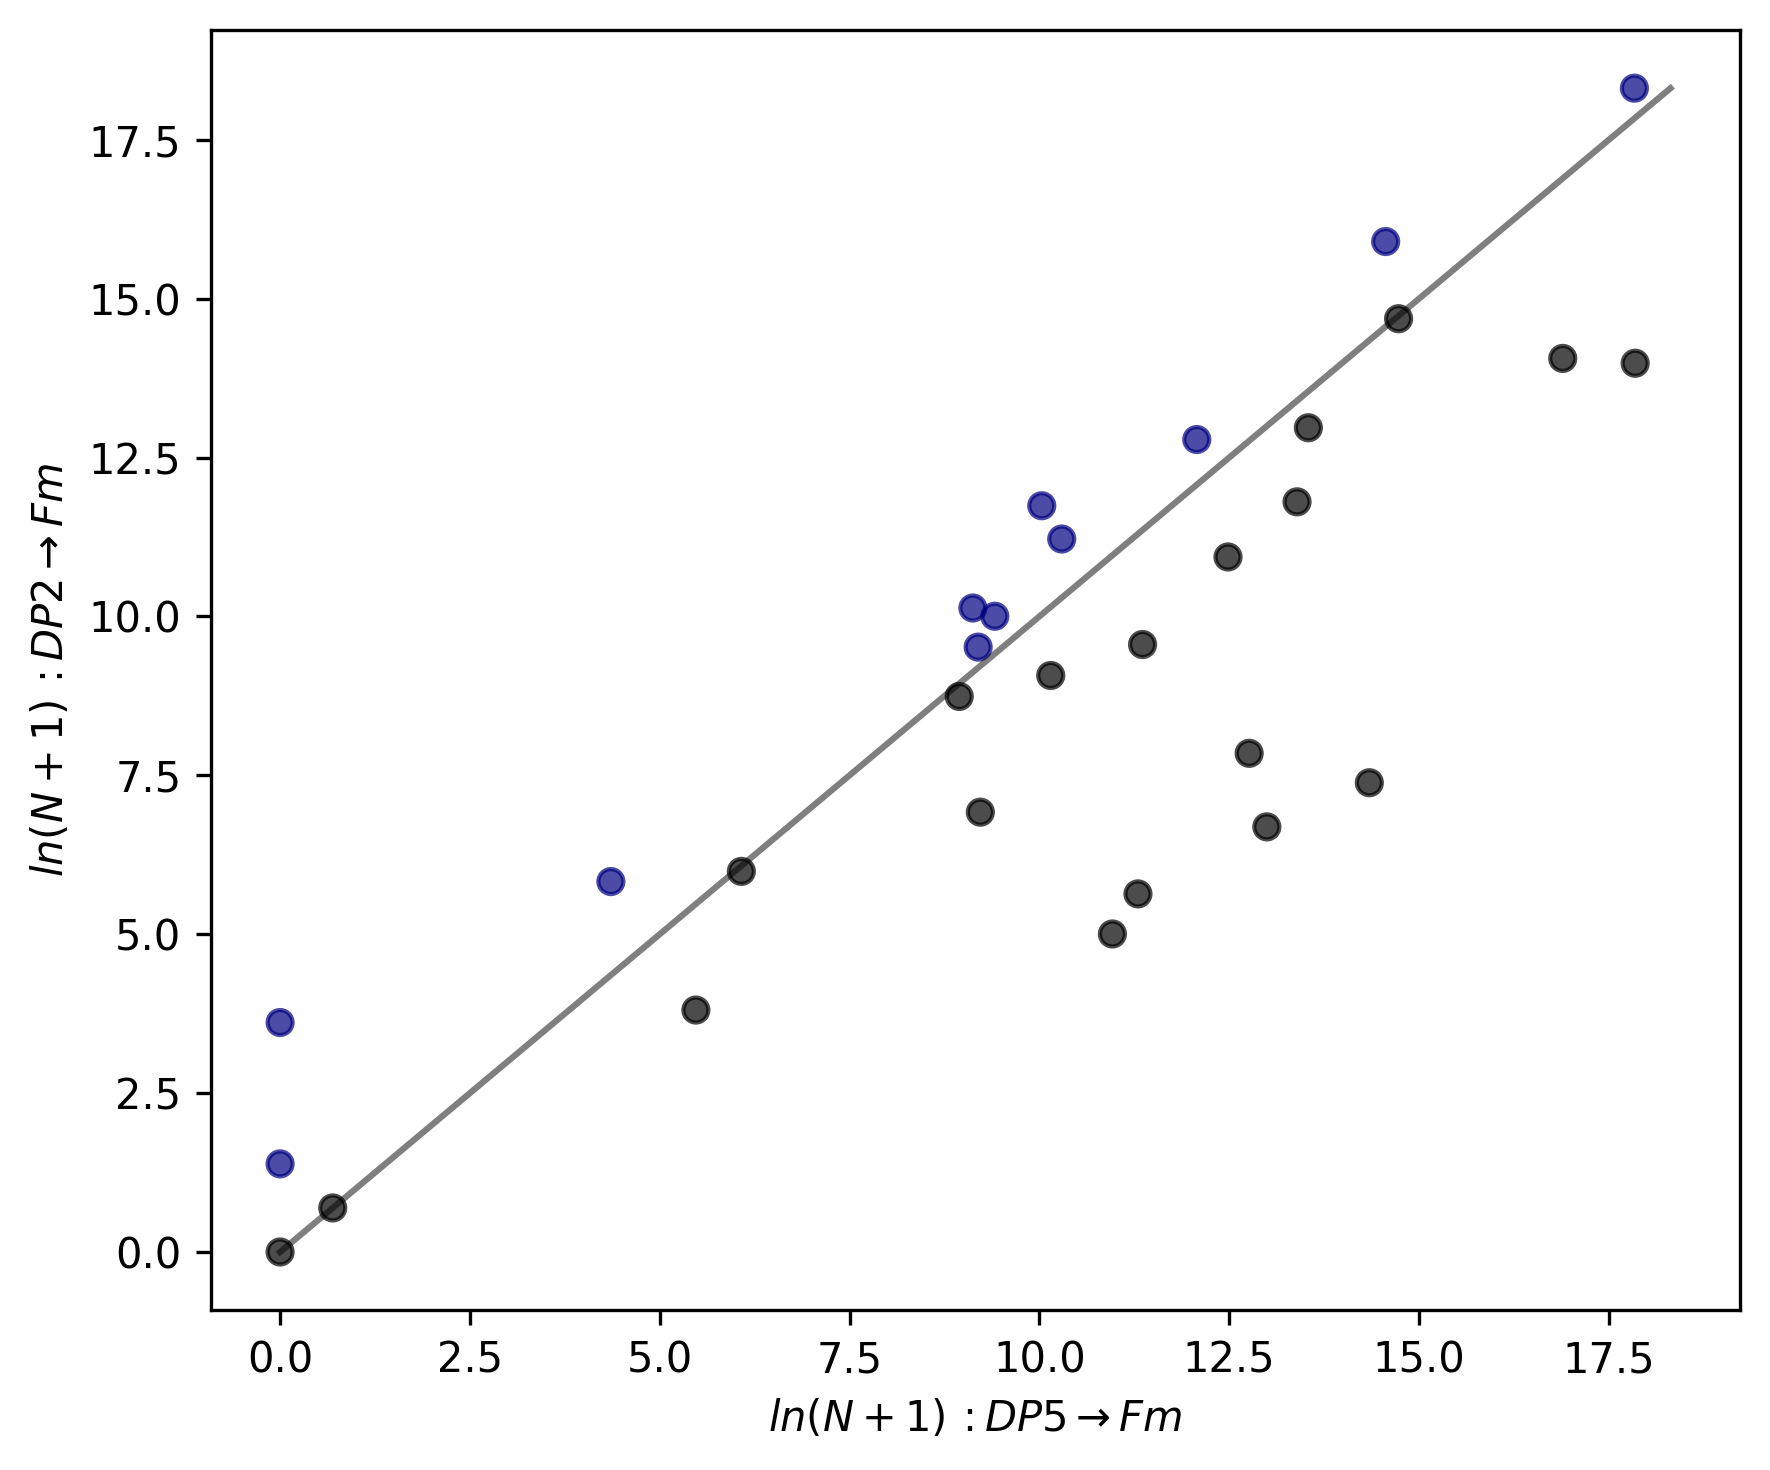

In [31]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)

colors = [
    'navy' if n2 > n5 else 'black'
    for n2, n5 in zip(df_out['nodes_2'], df_out['nodes_5'])
]
ax.scatter(
    np.log1p(df_out['nodes_5']),
    np.log1p(df_out['nodes_2']),
    alpha=0.7,
    c=colors,
)
min_val = min(
    np.log1p(df_out['nodes_5'].min()), np.log1p(df_out['nodes_2'].min())
)
max_val = max(
    np.log1p(df_out['nodes_5'].max()), np.log1p(df_out['nodes_2'].max())
)
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='black',
    linestyle='-',
    alpha=0.5,
)
ax.set_xlabel(r'$ln(N + 1) \, : DP5 \rightarrow Fm $')
ax.set_ylabel(r'$ln(N + 1) \, : DP2 \rightarrow Fm $')
fig.tight_layout()
plt.savefig('nodes-dpm.pdf', bbox_inches='tight')
plt.show()

In [25]:
df_out

,name,nodes_5,solved,nodes_2
0,dpm-001-20-5x6,12255,True,22112
1,dpm-002-20-5x6,9840,True,13603
2,dpm-003-20-5x6,77,True,339
3,dpm-004-20-5x6,7669,True,6260
4,dpm-005-20-5x6,21733552,True,1278364
5,dpm-006-20-5x6,1,True,1
6,dpm-007-20-5x6,22741,True,125843
7,dpm-008-20-5x6,0,True,3
8,dpm-009-20-5x6,762140,True,429405
9,dpm-010-20-5x6,25601,True,8704


In [24]:
(df_out["nodes_2"] > df_out["nodes_5"]).sum()

np.int64(11)